# Tutorial 7
## Unsupervised Machine Learning Algorithms

In [1]:
# pip install mglearn

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data into cancer dataframe
cancer = load_breast_cancer()

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [4]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

StandardScaler()

In [5]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [-1.98331111 -2.21220784 -1.94000195 -1.41936988 -3.17693457 -1.67256345
 -1.11319845 -1.24998427 -2.75560937 -1.85445424 -1.02191858 -1.4868881
 -1.02052074 -0.70421713 -1.71897011 -1.30222621 -1.07957012 -1.86438565
 -1.39523134 -1.04796104 -1.679

In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[-1.78604978 -2.05816786 -1.75662321 -1.34488859 -2.04266021 -1.44129779
 -1.11319845 -1.24998427 -1.63110929 -1.89575358 -1.03503849 -1.44076411
 -0.97696708 -0.69556019 -1.34555699 -1.21968697 -1.07957012 -1.86438565
 -1.60787973 -0.98008558 -1.52934175 -1.83027929 -1.53313661 -1.12357177
 -2.00314957 -1.32214894 -1.32535194 -1.72016962 -2.2754392  -1.70968006]
per-feature maximum after scaling:
[3.63974795 3.32863345 3.63430875 4.41315192 3.33662687 4.7278806
 3.60760706 3.55735149 4.05038123 5.10743564 3.04076245 2.37415338
 3.44110875 2.38256832 2.92100369 4.13122014 9.21898705 3.36886884
 7.51251605 2.94447199 3.37385732 2.56940109 3.27786462 3.92804723
 3.49299922 5.20426209 4.81886221 2.31373188 6.52208604 7.33879997]


In [7]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer data
cancer = load_breast_cancer()

# Create an object using StandardScaler()
scaler = StandardScaler()
scaler.fit(cancer.data)

# Standardized the cancer dataframe
X_scaled = scaler.transform(cancer.data)

In [8]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2)

# fit PCA model to breast cancer data
principalComponents_breast = pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

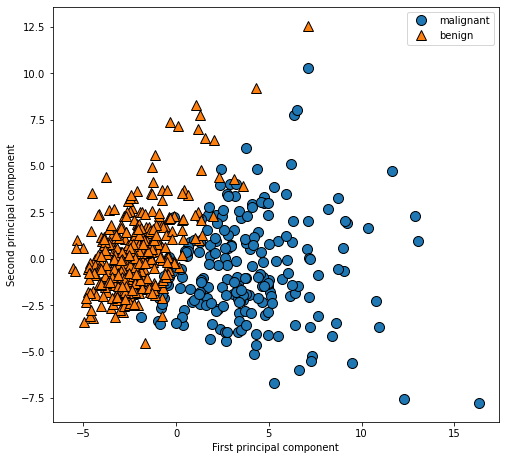

In [9]:
# plot first vs. second principal component, colored by class
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [10]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [11]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

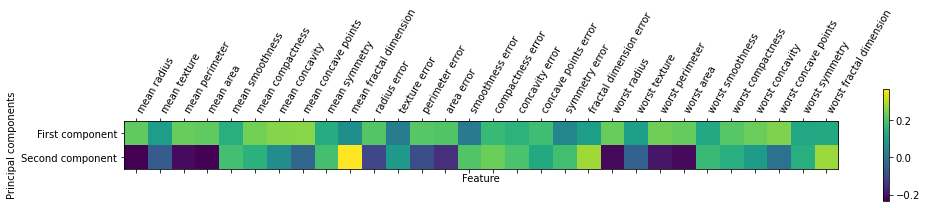

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## k-Means Clustering

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)

# Train the model
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [15]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


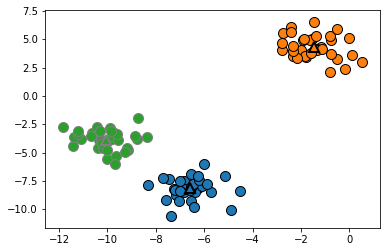

In [16]:
# Use mglearn to plot the graph
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

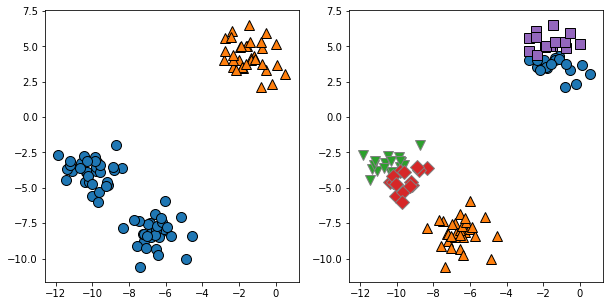

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Feature 1')

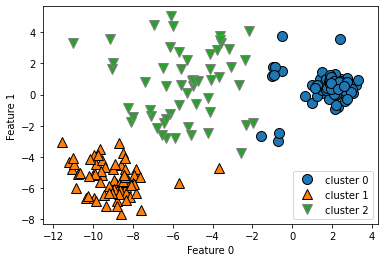

In [18]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## CASE STUDY

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)

### Seeds Dataset: Silhouette Score
Per the UCI Data Repository, the fields in the Seeds dataset we will be using correspond to:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [20]:
# Load the dataset
seeds = pd.read_csv('Seed_Data.csv')

seeds

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [21]:
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]
y = seeds['target']

In [22]:
# See what our features look like
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [23]:
kmeans_seeds = KMeans(n_clusters = 3)
kmeans_seeds.fit(X)
C = kmeans_seeds.labels_
C.shape
assign_seeds = C.reshape(-1, 1)
# assign_seeds

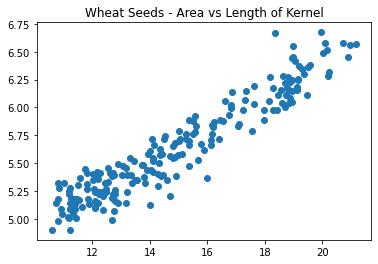

In [24]:
plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [25]:
import numpy as np

# To plot the cluster data, consider two columns
X1 = X['A']
X2 = X['LK']

# Transform into numpy array
X11 = X1[:, np.newaxis]
X22 = X2[:, np.newaxis]

# Display rows and columns of the arrays
X11.shape, X22.shape, assign_seeds.shape

((210, 1), (210, 1), (210, 1))

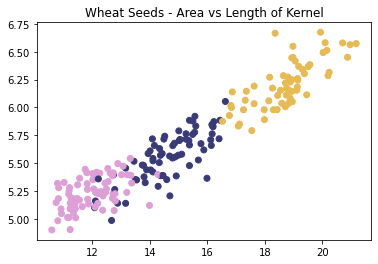

In [26]:
plt.scatter(X11, X22, c = assign_seeds, cmap = 'tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

## Task
* Plot the clusters for other columns and check the distribution of data for different clusters.

## Reference: 
* Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.